                  DATE         TAG  POSTS
0  2008-07-01 00:00:00          c#      3
1  2008-08-01 00:00:00    assembly      8
2  2008-08-01 00:00:00  javascript    162
3  2008-08-01 00:00:00           c     85
4  2008-08-01 00:00:00      python    124
(1991, 3)
DATE     1991
TAG      1991
POSTS    1991
dtype: int64
              POSTS
TAG                
javascript  2056510
     DATE  POSTS
TAG             
go    129    129
TAG         assembly   c  c#  c++  delphi  go  java  javascript  perl  php  \
DATE                                                                         
2008-07-01       NaN NaN NaN  NaN     NaN NaN   NaN         NaN   NaN  NaN   
2008-08-01       NaN NaN NaN  NaN     NaN NaN   NaN         NaN   NaN  NaN   
2008-09-01       NaN NaN NaN  NaN     NaN NaN   NaN         NaN   NaN  NaN   
2008-10-01       NaN NaN NaN  NaN     NaN NaN   NaN         NaN   NaN  NaN   
2008-11-01       NaN NaN NaN  NaN     NaN NaN   NaN         NaN   NaN  NaN   

TAG         python   r  r

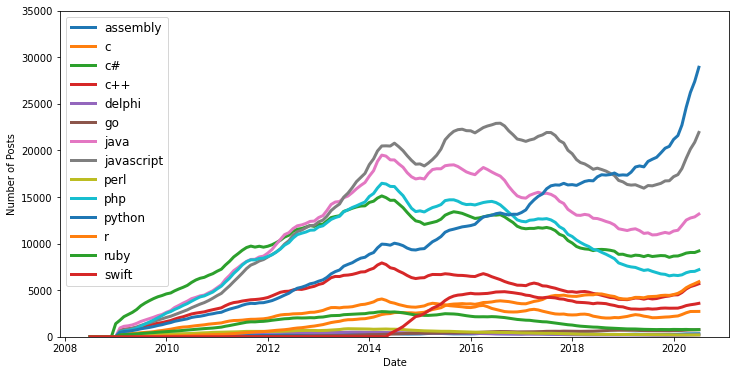

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('QueryResults.csv')
print(df.head())
print(df.shape)

print(df.count())

grouped_programming_language = df.groupby('TAG').sum()
top_programming_language = grouped_programming_language.sort_values(
    by='POSTS', ascending=False).head(1)

print(top_programming_language)

entries_count = df.groupby('TAG').count()
least_entries = entries_count.sort_values(by='POSTS', ascending=True).head(1)
print(least_entries)

df.DATE = pd.to_datetime(df.DATE)

reshaped_df = df.pivot_table(index='DATE', columns='TAG', values='POSTS').rolling(window=7).mean()
print(reshaped_df.head())
print(reshaped_df.tail())
print(reshaped_df.shape)

print(reshaped_df.columns)
print(reshaped_df.count())

reshaped_df.fillna(0, inplace=True)
print(reshaped_df.head())

plt.figure(figsize=(12, 6))
plt.ylim(0, 35000)
plt.xlabel('Date')
plt.ylabel('Number of Posts')
for column in reshaped_df.columns:
    plt.plot(reshaped_df[column], label=column, linewidth=3)
plt.legend(fontsize=12)
